# Mask RCNN - train lunar crater dataset
Zhiang Chen, Sep 16, 2018
#### 1. import libraries

In [1]:
import os
import sys
import random
import math
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

import crater

Using TensorFlow backend.


#### 2. import dataset

In [2]:
config = crater.CraterConfig()
config.display()

train_dataset = crater.CraterDataset()
valid_dataset = crater.CraterDataset()

def load_dataset(dataset, subset):
    assert subset in ['train', 'val']
    
    if subset is 'train':
        for i in range(10):
            dataset.load_crater('../../dataset/lunar_craters', 'train', str(i))
    else:
        for i in range(42, 46):
            dataset.load_crater('../../dataset/lunar_craters', 'val', str(i))
    

load_dataset(train_dataset, 'train')
load_dataset(valid_dataset, 'val')

train_dataset.prepare()
valid_dataset.prepare()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        600
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL                  3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'rpn_class_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

#### 3. create network model

In [3]:
ROOT_DIR = os.path.abspath("../../")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

In [4]:
# the model will be saved under ../../logs
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [5]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

#### 4. training model

In [6]:
model.train(train_dataset, valid_dataset, 
            learning_rate=config.LEARNING_RATE, 
            epochs=1, 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /models/Mask_RCNN/logs/crater20180917T0326/mask_rcnn_crater_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.5/dist-packages/keras/engine/training_generator.py:46: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/1
100/100 [==============================] - 98s 980ms/step - loss: 2.6232 - rpn_class_loss: 0.5003 - rpn_bbox_loss: 1.0699 - mrcnn_class_loss: 0.0357 - mrcnn_bbox_loss: 0.6655 - mrcnn_mask_loss: 0.3518 - val_loss: 2.0012 - val_rpn_class_loss: 0.3168 - val_rpn_bbox_loss: 0.7737 - val_mrcnn_class_loss: 0.0243 - val_mrcnn_bbox_loss: 0.5821 - val_mrcnn_mask_loss: 0.3043


In [7]:
model.train(train_dataset, valid_dataset, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=200, 
            layers="all")


Starting at epoch 1. LR=0.0001

Checkpoint Path: /models/Mask_RCNN/logs/crater20180917T0326/mask_rcnn_crater_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.5/dist-packages/keras/engine/training_generator.py:46: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 2/200
100/100 [==============================] - 120s 1s/step - loss: 1.9769 - rpn_class_loss: 0.3670 - rpn_bbox_loss: 0.8681 - mrcnn_class_loss: 0.0291 - mrcnn_bbox_loss: 0.4048 - mrcnn_mask_loss: 0.3079 - val_loss: 1.6268 - val_rpn_class_loss: 0.2152 - val_rpn_bbox_loss: 0.7231 - val_mrcnn_class_loss: 0.0169 - val_mrcnn_bbox_loss: 0.3902 - val_mrcnn_mask_loss: 0.2813
Epoch 3/200
100/100 [==============================] - 96s 963ms/step - loss: 2.0244 - rpn_class_loss: 0.3869 - rpn_bbox_loss: 0.8758 - mrcnn_class_loss: 0.0346 - mrcnn_bbox_loss: 0.4108 - mrcnn_mask_loss: 0.3163 - val_loss: 1.8766 - val_rpn_class_loss: 0.3254 - val_rpn_bbox_loss: 0.8067 - val_mrcnn_class_loss: 0.0302 - val_mrcnn_bbox_loss: 0.4159 - val_mrcnn_mask_loss: 0.2984
Epoch 4/200
100/100 [==============================] - 96s 961ms/step - loss: 1.8656 - rpn_class_loss: 0.3217 - rpn_bbox_loss: 0.8121 - mrcnn_class_loss: 0.0318 - mrcnn_bbox_loss: 0.3942 - mrcnn_mask_loss: 0.3058 - val_loss: 1.7835 - val_rpn_

100/100 [==============================] - 97s 968ms/step - loss: 1.5383 - rpn_class_loss: 0.2405 - rpn_bbox_loss: 0.6945 - mrcnn_class_loss: 0.0329 - mrcnn_bbox_loss: 0.2751 - mrcnn_mask_loss: 0.2954 - val_loss: 1.7072 - val_rpn_class_loss: 0.2790 - val_rpn_bbox_loss: 0.7314 - val_mrcnn_class_loss: 0.0341 - val_mrcnn_bbox_loss: 0.3271 - val_mrcnn_mask_loss: 0.3357
Epoch 24/200
100/100 [==============================] - 97s 970ms/step - loss: 1.6089 - rpn_class_loss: 0.2602 - rpn_bbox_loss: 0.7079 - mrcnn_class_loss: 0.0395 - mrcnn_bbox_loss: 0.2964 - mrcnn_mask_loss: 0.3048 - val_loss: 1.4552 - val_rpn_class_loss: 0.1933 - val_rpn_bbox_loss: 0.6751 - val_mrcnn_class_loss: 0.0241 - val_mrcnn_bbox_loss: 0.2809 - val_mrcnn_mask_loss: 0.2818
Epoch 25/200
100/100 [==============================] - 97s 970ms/step - loss: 1.4950 - rpn_class_loss: 0.2240 - rpn_bbox_loss: 0.6775 - mrcnn_class_loss: 0.0316 - mrcnn_bbox_loss: 0.2764 - mrcnn_mask_loss: 0.2855 - val_loss: 1.4870 - val_rpn_class_lo

100/100 [==============================] - 97s 972ms/step - loss: 1.4146 - rpn_class_loss: 0.2213 - rpn_bbox_loss: 0.6003 - mrcnn_class_loss: 0.0465 - mrcnn_bbox_loss: 0.2485 - mrcnn_mask_loss: 0.2981 - val_loss: 1.3914 - val_rpn_class_loss: 0.1999 - val_rpn_bbox_loss: 0.6316 - val_mrcnn_class_loss: 0.0361 - val_mrcnn_bbox_loss: 0.2523 - val_mrcnn_mask_loss: 0.2714
Epoch 45/200
100/100 [==============================] - 97s 968ms/step - loss: 1.4355 - rpn_class_loss: 0.2290 - rpn_bbox_loss: 0.6222 - mrcnn_class_loss: 0.0422 - mrcnn_bbox_loss: 0.2352 - mrcnn_mask_loss: 0.3070 - val_loss: 1.4702 - val_rpn_class_loss: 0.2114 - val_rpn_bbox_loss: 0.6744 - val_mrcnn_class_loss: 0.0344 - val_mrcnn_bbox_loss: 0.2746 - val_mrcnn_mask_loss: 0.2754
Epoch 46/200
100/100 [==============================] - 97s 969ms/step - loss: 1.4245 - rpn_class_loss: 0.2287 - rpn_bbox_loss: 0.6125 - mrcnn_class_loss: 0.0464 - mrcnn_bbox_loss: 0.2303 - mrcnn_mask_loss: 0.3065 - val_loss: 1.4903 - val_rpn_class_lo

100/100 [==============================] - 97s 968ms/step - loss: 1.2135 - rpn_class_loss: 0.1748 - rpn_bbox_loss: 0.5481 - mrcnn_class_loss: 0.0388 - mrcnn_bbox_loss: 0.1849 - mrcnn_mask_loss: 0.2670 - val_loss: 1.3248 - val_rpn_class_loss: 0.1830 - val_rpn_bbox_loss: 0.6175 - val_mrcnn_class_loss: 0.0334 - val_mrcnn_bbox_loss: 0.2268 - val_mrcnn_mask_loss: 0.2641
Epoch 66/200
100/100 [==============================] - 97s 968ms/step - loss: 1.3361 - rpn_class_loss: 0.2243 - rpn_bbox_loss: 0.5780 - mrcnn_class_loss: 0.0456 - mrcnn_bbox_loss: 0.1999 - mrcnn_mask_loss: 0.2883 - val_loss: 1.5312 - val_rpn_class_loss: 0.2399 - val_rpn_bbox_loss: 0.6902 - val_mrcnn_class_loss: 0.0449 - val_mrcnn_bbox_loss: 0.2627 - val_mrcnn_mask_loss: 0.2934
Epoch 67/200
100/100 [==============================] - 97s 968ms/step - loss: 1.3481 - rpn_class_loss: 0.2340 - rpn_bbox_loss: 0.5712 - mrcnn_class_loss: 0.0517 - mrcnn_bbox_loss: 0.2099 - mrcnn_mask_loss: 0.2812 - val_loss: 1.4288 - val_rpn_class_lo

100/100 [==============================] - 97s 966ms/step - loss: 1.2650 - rpn_class_loss: 0.2188 - rpn_bbox_loss: 0.5130 - mrcnn_class_loss: 0.0530 - mrcnn_bbox_loss: 0.1885 - mrcnn_mask_loss: 0.2917 - val_loss: 1.3626 - val_rpn_class_loss: 0.1944 - val_rpn_bbox_loss: 0.6009 - val_mrcnn_class_loss: 0.0583 - val_mrcnn_bbox_loss: 0.2177 - val_mrcnn_mask_loss: 0.2913
Epoch 87/200
100/100 [==============================] - 96s 959ms/step - loss: 1.2307 - rpn_class_loss: 0.2064 - rpn_bbox_loss: 0.4965 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.1821 - mrcnn_mask_loss: 0.2893 - val_loss: 1.2587 - val_rpn_class_loss: 0.1566 - val_rpn_bbox_loss: 0.5569 - val_mrcnn_class_loss: 0.0334 - val_mrcnn_bbox_loss: 0.2278 - val_mrcnn_mask_loss: 0.2840
Epoch 88/200
100/100 [==============================] - 97s 969ms/step - loss: 1.2603 - rpn_class_loss: 0.2132 - rpn_bbox_loss: 0.5156 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.1793 - mrcnn_mask_loss: 0.3001 - val_loss: 1.3088 - val_rpn_class_lo

100/100 [==============================] - 96s 965ms/step - loss: 1.1282 - rpn_class_loss: 0.1779 - rpn_bbox_loss: 0.4382 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.1713 - mrcnn_mask_loss: 0.2858 - val_loss: 1.3895 - val_rpn_class_loss: 0.2325 - val_rpn_bbox_loss: 0.5804 - val_mrcnn_class_loss: 0.0604 - val_mrcnn_bbox_loss: 0.2324 - val_mrcnn_mask_loss: 0.2838
Epoch 108/200
100/100 [==============================] - 96s 963ms/step - loss: 1.0925 - rpn_class_loss: 0.1794 - rpn_bbox_loss: 0.4050 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.1620 - mrcnn_mask_loss: 0.2894 - val_loss: 1.3437 - val_rpn_class_loss: 0.1843 - val_rpn_bbox_loss: 0.5878 - val_mrcnn_class_loss: 0.0447 - val_mrcnn_bbox_loss: 0.2437 - val_mrcnn_mask_loss: 0.2832
Epoch 109/200
100/100 [==============================] - 96s 963ms/step - loss: 1.1531 - rpn_class_loss: 0.1915 - rpn_bbox_loss: 0.4374 - mrcnn_class_loss: 0.0627 - mrcnn_bbox_loss: 0.1731 - mrcnn_mask_loss: 0.2884 - val_loss: 1.3737 - val_rpn_class_

100/100 [==============================] - 96s 961ms/step - loss: 1.1955 - rpn_class_loss: 0.2113 - rpn_bbox_loss: 0.4378 - mrcnn_class_loss: 0.0811 - mrcnn_bbox_loss: 0.1717 - mrcnn_mask_loss: 0.2936 - val_loss: 1.0823 - val_rpn_class_loss: 0.1309 - val_rpn_bbox_loss: 0.4908 - val_mrcnn_class_loss: 0.0351 - val_mrcnn_bbox_loss: 0.1894 - val_mrcnn_mask_loss: 0.2361
Epoch 129/200
100/100 [==============================] - 96s 962ms/step - loss: 1.1266 - rpn_class_loss: 0.1922 - rpn_bbox_loss: 0.3973 - mrcnn_class_loss: 0.0756 - mrcnn_bbox_loss: 0.1646 - mrcnn_mask_loss: 0.2969 - val_loss: 1.3233 - val_rpn_class_loss: 0.1932 - val_rpn_bbox_loss: 0.5415 - val_mrcnn_class_loss: 0.0590 - val_mrcnn_bbox_loss: 0.2375 - val_mrcnn_mask_loss: 0.2922
Epoch 130/200
100/100 [==============================] - 96s 964ms/step - loss: 0.9339 - rpn_class_loss: 0.1475 - rpn_bbox_loss: 0.3359 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.1435 - mrcnn_mask_loss: 0.2504 - val_loss: 1.5374 - val_rpn_class_

100/100 [==============================] - 96s 963ms/step - loss: 1.0220 - rpn_class_loss: 0.1712 - rpn_bbox_loss: 0.3454 - mrcnn_class_loss: 0.0709 - mrcnn_bbox_loss: 0.1496 - mrcnn_mask_loss: 0.2849 - val_loss: 1.1325 - val_rpn_class_loss: 0.1433 - val_rpn_bbox_loss: 0.5092 - val_mrcnn_class_loss: 0.0403 - val_mrcnn_bbox_loss: 0.1904 - val_mrcnn_mask_loss: 0.2493
Epoch 150/200
100/100 [==============================] - 96s 963ms/step - loss: 1.0145 - rpn_class_loss: 0.1698 - rpn_bbox_loss: 0.3498 - mrcnn_class_loss: 0.0716 - mrcnn_bbox_loss: 0.1428 - mrcnn_mask_loss: 0.2805 - val_loss: 1.2189 - val_rpn_class_loss: 0.1550 - val_rpn_bbox_loss: 0.5113 - val_mrcnn_class_loss: 0.0581 - val_mrcnn_bbox_loss: 0.2177 - val_mrcnn_mask_loss: 0.2768
Epoch 151/200
100/100 [==============================] - 96s 964ms/step - loss: 0.9794 - rpn_class_loss: 0.1626 - rpn_bbox_loss: 0.3394 - mrcnn_class_loss: 0.0682 - mrcnn_bbox_loss: 0.1432 - mrcnn_mask_loss: 0.2658 - val_loss: 1.4222 - val_rpn_class_

100/100 [==============================] - 95s 954ms/step - loss: 1.1641 - rpn_class_loss: 0.2105 - rpn_bbox_loss: 0.3957 - mrcnn_class_loss: 0.0935 - mrcnn_bbox_loss: 0.1624 - mrcnn_mask_loss: 0.3021 - val_loss: 1.1569 - val_rpn_class_loss: 0.1441 - val_rpn_bbox_loss: 0.4929 - val_mrcnn_class_loss: 0.0490 - val_mrcnn_bbox_loss: 0.2014 - val_mrcnn_mask_loss: 0.2695
Epoch 171/200
100/100 [==============================] - 96s 959ms/step - loss: 1.0109 - rpn_class_loss: 0.1750 - rpn_bbox_loss: 0.3362 - mrcnn_class_loss: 0.0726 - mrcnn_bbox_loss: 0.1392 - mrcnn_mask_loss: 0.2879 - val_loss: 1.2362 - val_rpn_class_loss: 0.1849 - val_rpn_bbox_loss: 0.5111 - val_mrcnn_class_loss: 0.0479 - val_mrcnn_bbox_loss: 0.2099 - val_mrcnn_mask_loss: 0.2824
Epoch 172/200
100/100 [==============================] - 96s 961ms/step - loss: 1.0556 - rpn_class_loss: 0.1781 - rpn_bbox_loss: 0.3588 - mrcnn_class_loss: 0.0802 - mrcnn_bbox_loss: 0.1476 - mrcnn_mask_loss: 0.2909 - val_loss: 1.1498 - val_rpn_class_

100/100 [==============================] - 96s 963ms/step - loss: 0.9370 - rpn_class_loss: 0.1664 - rpn_bbox_loss: 0.3171 - mrcnn_class_loss: 0.0732 - mrcnn_bbox_loss: 0.1256 - mrcnn_mask_loss: 0.2547 - val_loss: 1.3147 - val_rpn_class_loss: 0.1933 - val_rpn_bbox_loss: 0.5367 - val_mrcnn_class_loss: 0.0749 - val_mrcnn_bbox_loss: 0.2169 - val_mrcnn_mask_loss: 0.2928
Epoch 192/200
100/100 [==============================] - 96s 963ms/step - loss: 1.0252 - rpn_class_loss: 0.1783 - rpn_bbox_loss: 0.3371 - mrcnn_class_loss: 0.0845 - mrcnn_bbox_loss: 0.1438 - mrcnn_mask_loss: 0.2816 - val_loss: 1.1734 - val_rpn_class_loss: 0.1511 - val_rpn_bbox_loss: 0.5212 - val_mrcnn_class_loss: 0.0543 - val_mrcnn_bbox_loss: 0.1885 - val_mrcnn_mask_loss: 0.2582
Epoch 193/200
100/100 [==============================] - 95s 954ms/step - loss: 0.9930 - rpn_class_loss: 0.1709 - rpn_bbox_loss: 0.3176 - mrcnn_class_loss: 0.0868 - mrcnn_bbox_loss: 0.1410 - mrcnn_mask_loss: 0.2769 - val_loss: 1.2480 - val_rpn_class_

In [10]:
class InferenceConfig(crater.CraterConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(ROOT_DIR, "logs/crater20180917T0326/mask_rcnn_crater_0200.h5")
#model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /models/Mask_RCNN/logs/crater20180917T0326/mask_rcnn_crater_0200.h5
Re-starting from epoch 200


In [15]:
del(valid_dataset)

In [16]:
train_dataset = crater.CraterDataset()
valid_dataset = crater.CraterDataset()

def load_dataset(dataset, subset):
    assert subset in ['train', 'val']
    
    if subset is 'train':
        for i in range(0, 10):
            dataset.load_crater('../../dataset/lunar_craters', 'train', str(i))
    else:
        for i in range(42, 46):
            dataset.load_crater('../../dataset/lunar_craters', 'val', str(i))
    

load_dataset(train_dataset, 'train')
load_dataset(valid_dataset, 'val')

train_dataset.prepare()
valid_dataset.prepare()

loading 0
loading 1
loading 2
loading 3
loading 4
loading 5
loading 6
loading 7
loading 8
loading 9
loading 42
loading 43
loading 44
loading 45


original_image           shape: (256, 256, 3)         min:    0.00000  max:  144.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max:  256.00000  int64
gt_class_id              shape: (17,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (17, 4)               min:    7.00000  max:  254.00000  int32
gt_mask                  shape: (256, 256, 17)        min:    0.00000  max:    1.00000  bool


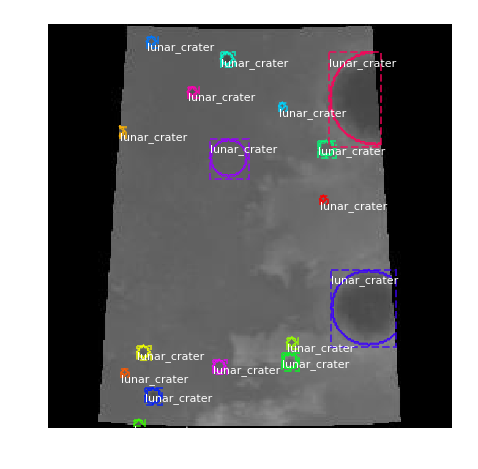

In [17]:
image_id = random.choice(valid_dataset.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(valid_dataset, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            train_dataset.class_names, figsize=(8, 8))

In [20]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  144.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:   40.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  256.00000  int64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


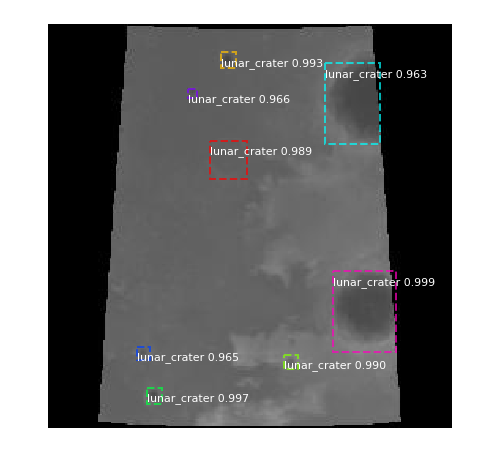

In [21]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            valid_dataset.class_names, r['scores'], ax=get_ax())